# **LSTM Model to Predict Mortality Rate of Patient**





### Data processing from MIMIC-III using BigQuery

To simplify the data processing, matching icu patient data obtained from preprocessed MIMIC-III from https://bmjopen.bmj.com/content/11/7/e044779; https://datadryad.org/stash/dataset/doi:10.5061/dryad.0p2ngf1zd

The rest of data is manually processed by refering to the patient id provided in the previous dataset
### BQ Code:

SELECT DISTINCT a.*, c.intime,c.outtime,c.hospital_expire_flag, d.* FROM `physionet-data.mimiciii_derived.pivoted_vital` as a,`physionet-data.mimiciii_derived.icustay_hours` as b, `physionet-data.mimiciii_derived.icustay_detail` as c, `bme2121.project.data01` as d  WHERE  a.icustay_id=b.icustay_id AND a.icustay_id=c.icustay_id AND d.ID=c.hadm_id AND c.hospital_expire_flag is not NULL

SELECT icustay_id,  CAST(EXTRACT (DAY FROM (charttime - intime))AS INT64)*24 + EXTRACT (HOUR FROM(charttime - intime)) + CAST(EXTRACT (MINUTE FROM (charttime - intime))AS INT64)/60 + CAST(EXTRACT (SECOND FROM (charttime - intime))AS INT64)/3600 AS absoluteTime, HeartRate, SysBP, DiasBP, MeanBP, RespRate, TempC, SpO2, Glucose,age, gendera,BMI, hypertensive, atrialfibrillation, CHD_with_no_MI, diabetes, deficiencyanemias, depression, Hyperlipemia, Renal_failure, COPD, hospital_expire_flag FROM `bme2121.project.test2`

SELECT DISTINCT a.*, c.intime,c.outtime,c.hospital_expire_flag, d.*, e.*, f.*, g.* FROM `physionet-data.mimiciii_derived.pivoted_vital` as a,`physionet-data.mimiciii_derived.icustay_hours` as b, `physionet-data.mimiciii_derived.icustay_detail` as c, `bme2121.project.data01` as d,`physionet-data.mimiciii_derived.pivoted_lab` as e, `physionet-data.mimiciii_derived.urineoutput` as f, `physionet-data.mimiciii_derived.pivoted_bg_art` as g WHERE  a.icustay_id=b.icustay_id AND a.icustay_id=c.icustay_id AND d.ID=c.hadm_id AND c.hadm_id=e.hadm_id AND a.icustay_id=f.icustay_id AND a.icustay_id=g.icustay_id AND c.hospital_expire_flag is not NULL

SELECT DISTINCT a.icustay_id, a.intime, g.charttime as bgtime,  g.SPECIMEN_PROB,g.SO2,g.PO2,g.PCO2,g.fio2_chartevents,g.FIO2,g.AADO2,g.AADO2_calc,g.PaO2FiO2Ratio,g.PH,g.BASEEXCESS,g.TOTALCO2,g.CARBOXYHEMOGLOBIN,g.METHEMOGLOBIN,g.CALCIUM,g.INTUBATED,g.TIDALVOLUME,g.VENTILATIONRATE,g.VENTILATOR,g.PEEP,g.O2Flow,g.REQUIREDO2  FROM `bme2121.project.test2` as a, `physionet-data.mimiciii_derived.pivoted_bg_art` as g WHERE  a.icustay_id=g.icustay_id  

SELECT DISTINCT a.icustay_id, a.intime, e.charttime as labtime, f.charttime as urinetime, e.ANIONGAP,e.ALBUMIN,e.BANDS,e.BICARBONATE,e.BILIRUBIN,e.CREATININE,e.CHLORIDE,e.HEMATOCRIT,e.HEMOGLOBIN,e.LACTATE,e.PLATELET,e.POTASSIUM,e.PTT,e.INR,e.PT,e.SODIUM,e.BUN,e.WBC, f.value as urine,  FROM `bme2121.project.test2` as a,`physionet-data.mimiciii_derived.pivoted_lab` as e, `physionet-data.mimiciii_derived.urineoutput` as f WHERE   a.ID=e.hadm_id AND a.icustay_id=f.icustay_id

SELECT  g.icustay_id,
CAST(EXTRACT (DAY FROM (g.bgtime - a.intime))AS INT64)*24 + EXTRACT (HOUR FROM(g.bgtime - a.intime)) + CAST(EXTRACT (MINUTE FROM (g.bgtime - a.intime))AS INT64)/60 + CAST(EXTRACT (SECOND FROM (g.bgtime - a.intime))AS INT64)/3600 AS absoluteTime,
g.SPECIMEN_PROB,g.SO2,g.PO2,g.PCO2,g.fio2_chartevents,g.FIO2,g.AADO2,g.AADO2_calc,g.PaO2FiO2Ratio,g.PH,g.BASEEXCESS,g.TOTALCO2,g.CARBOXYHEMOGLOBIN,g.METHEMOGLOBIN,g.CALCIUM,g.INTUBATED,g.TIDALVOLUME,g.VENTILATIONRATE,g.VENTILATOR,g.PEEP,g.O2Flow,g.REQUIREDO2 FROM `bme2121.project.test2` as a, `bme2121.project.trialbg` as g WHERE g.icustay_id=a.icustay_id

SELECT e.icustay_id,
CAST(EXTRACT (DAY FROM (e.labtime - a.intime))AS INT64)*24 + EXTRACT (HOUR FROM(e.labtime - a.intime)) + CAST(EXTRACT (MINUTE FROM (e.labtime - a.intime))AS INT64)/60 + CAST(EXTRACT (SECOND FROM (e.labtime - a.intime))AS INT64)/3600 AS labTime,
CAST(EXTRACT (DAY FROM (e.urinetime - a.intime))AS INT64)*24 + EXTRACT (HOUR FROM(e.urinetime - a.intime)) + CAST(EXTRACT (MINUTE FROM (e.urinetime - a.intime))AS INT64)/60 + CAST(EXTRACT (SECOND FROM (e.urinetime - a.intime))AS INT64)/3600 AS urineTime,
 e.ANIONGAP,e.ALBUMIN,e.BANDS,e.BICARBONATE,e.BILIRUBIN,e.CREATININE,e.CHLORIDE,e.HEMATOCRIT,e.HEMOGLOBIN,e.LACTATE,e.PLATELET,e.POTASSIUM,e.PTT,e.INR,e.PT,e.SODIUM,e.BUN,e.WBC, e.urine FROM `bme2121.project.test2` as a,`bme2121.project.laburine` as e  WHERE e.icustay_id=a.icustay_id

SELECT DISTINCT e.icustay_id,
e.labTime,e.ANIONGAP,e.ALBUMIN,e.BANDS,e.BICARBONATE,e.BILIRUBIN,e.CREATININE,e.CHLORIDE,e.HEMATOCRIT,e.HEMOGLOBIN,e.LACTATE,e.PLATELET,e.POTASSIUM,e.PTT,e.INR,e.PT,e.SODIUM,e.BUN,e.WBC, FROM`bme2121.project.calclaburine` as e
SELECT DISTINCT e.icustay_id,
e.urineTime, e.urine FROM`bme2121.project.calclaburine` as e

SELECT DISTINCT a.*,b.age, b.gendera, b.BMI, b.hypertensive, b.atrialfibrillation, b.CHD_with_no_MI, b.diabetes, b.deficiencyanemias, b.depression, b.Hyperlipemia, b.Renal_failure, b.COPD, b.hospital_expire_flag FROM `bme2121.project.calclab` as a, `bme2121.project.test3` as b  WHERE  a.icustay_id=b.icustay_id

SELECT DISTINCT a.*,b.age, b.gendera, b.BMI, b.hypertensive, b.atrialfibrillation, b.CHD_with_no_MI, b.diabetes, b.deficiencyanemias, b.depression, b.Hyperlipemia, b.Renal_failure, b.COPD, b.hospital_expire_flag FROM `bme2121.project.calcurine` as a, `bme2121.project.test3` as b  WHERE  a.icustay_id=b.icustay_id

SELECT DISTINCT a.*,b.age, b.gendera, b.BMI, b.hypertensive, b.atrialfibrillation, b.CHD_with_no_MI, b.diabetes, b.deficiencyanemias, b.depression, b.Hyperlipemia, b.Renal_failure, b.COPD, b.hospital_expire_flag FROM `bme2121.project.bgcalc` as a, `bme2121.project.test3` as b  WHERE  a.icustay_id=b.icustay_id

SELECT icustay_id, absoluteTime as absoluteTime, HeartRate, SysBP,DiasBP, MeanBP,RespRate, TempC, SpO2, Glucose, age, gendera, BMI, hypertensive, atrialfibrillation, CHD_with_no_MI,diabetes, deficiencyanemias, depression, Hyperlipemia, Renal_failure, COPD, hospital_expire_flag,NULL as ANIONGAP, NULL as ALBUMIN, NULL as BANDS, NULL as BICARBONATE, NULL as BILIRUBIN, NULL as CREATININE, NULL as CHLORIDE, NULL as HEMATOCRIT, NULL as HEMOGLOBIN, NULL as LACTATE, NULL as PLATELET, NULL as POTASSIUM, NULL as PTT, NULL as INR, NULL as PT, NULL as SODIUM, NULL as BUN, NULL as WBC, null as urine, NULL as SPECIMEN_PROB,NULL as SO2, NULL as PO2, NULL as PCO2, NULL as fio2_chartevents, NULL as FIO2, NULL as AADO2, NULL as AADO2_calc, NULL as PaO2FiO2Ratio, NULL as PH, NULL as BASEEXCESS, NULL as TOTALCO2, NULL as CARBOXYHEMOGLOBIN, NULL as METHEMOGLOBIN, NULL as CALCIUM, NULL as INTUBATED, NULL as TIDALVOLUME, NULL as VENTILATIONRATE, NULL as VENTILATOR, NULL as PEEP, null as O2Flow, NULL as REQUIREDO2   FROM `bme2121.project.test3`
UNION all
SELECT icustay_id, labTime as absoluteTime, NULL as HeartRate, NULL as SysBP,NULL as DiasBP, NULL as MeanBP,NULL as RespRate, NULL as TempC, NULL as SpO2, NULL as Glucose, age, gendera, BMI, hypertensive, atrialfibrillation, CHD_with_no_MI,diabetes, deficiencyanemias, depression, Hyperlipemia, Renal_failure, COPD, hospital_expire_flag,ANIONGAP, ALBUMIN, BANDS, BICARBONATE, BILIRUBIN, CREATININE, CHLORIDE, HEMATOCRIT, HEMOGLOBIN, LACTATE, PLATELET, POTASSIUM, PTT, INR, PT, SODIUM, BUN, WBC, null as urine,NULL as SPECIMEN_PROB,NULL as SO2, NULL as PO2, NULL as PCO2, NULL as fio2_chartevents, NULL as FIO2, NULL as AADO2, NULL as AADO2_calc, NULL as PaO2FiO2Ratio, NULL as PH, NULL as BASEEXCESS, NULL as TOTALCO2, NULL as CARBOXYHEMOGLOBIN, NULL as METHEMOGLOBIN, NULL as CALCIUM, NULL as INTUBATED, NULL as TIDALVOLUME, NULL as VENTILATIONRATE, NULL as VENTILATOR, NULL as PEEP, null as O2Flow, NULL as REQUIREDO2    
FROM `bme2121.project.labdata`
UNION all
SELECT icustay_id, urineTime as absoluteTime, NULL as HeartRate, NULL as SysBP,NULL as DiasBP, NULL as MeanBP,NULL as RespRate, NULL as TempC, NULL as SpO2, NULL as Glucose, age, gendera, BMI, hypertensive, atrialfibrillation, CHD_with_no_MI,diabetes, deficiencyanemias, depression, Hyperlipemia, Renal_failure, COPD, hospital_expire_flag, NULL as ANIONGAP, NULL as ALBUMIN, NULL as BANDS, NULL as BICARBONATE, NULL as BILIRUBIN, NULL as CREATININE, NULL as CHLORIDE, NULL as HEMATOCRIT, NULL as HEMOGLOBIN, NULL as LACTATE, NULL as PLATELET, NULL as POTASSIUM, NULL as PTT, NULL as INR, NULL as PT, NULL as SODIUM, NULL as BUN, NULL as WBC, urine, NULL as SPECIMEN_PROB,NULL as SO2, NULL as PO2, NULL as PCO2, NULL as fio2_chartevents, NULL as FIO2, NULL as AADO2, NULL as AADO2_calc, NULL as PaO2FiO2Ratio, NULL as PH, NULL as BASEEXCESS, NULL as TOTALCO2, NULL as CARBOXYHEMOGLOBIN, NULL as METHEMOGLOBIN, NULL as CALCIUM, NULL as INTUBATED, NULL as TIDALVOLUME, NULL as VENTILATIONRATE, NULL as VENTILATOR, NULL as PEEP, null as O2Flow, NULL as REQUIREDO2     FROM `bme2121.project.urinedata`
UNION ALL
SELECT icustay_id, absoluteTime as absoluteTime, NULL as HeartRate, NULL as SysBP,NULL as DiasBP, NULL as MeanBP,NULL as RespRate, NULL as TempC, NULL as SpO2, NULL as Glucose, age, gendera, BMI, hypertensive, atrialfibrillation, CHD_with_no_MI,diabetes, deficiencyanemias, depression, Hyperlipemia, Renal_failure, COPD, hospital_expire_flag,NULL as ANIONGAP, NULL as ALBUMIN, NULL as BANDS, NULL as BICARBONATE, NULL as BILIRUBIN, NULL as CREATININE, NULL as CHLORIDE, NULL as HEMATOCRIT, NULL as HEMOGLOBIN, NULL as LACTATE, NULL as PLATELET, NULL as POTASSIUM, NULL as PTT, NULL as INR, NULL as PT, NULL as SODIUM, NULL as BUN, NULL as WBC, null as urine, SPECIMEN_PROB,SO2, PO2, PCO2, fio2_chartevents, FIO2, AADO2, AADO2_calc, PaO2FiO2Ratio, PH, BASEEXCESS, TOTALCO2, CARBOXYHEMOGLOBIN, METHEMOGLOBIN, CALCIUM, INTUBATED, TIDALVOLUME, VENTILATIONRATE, VENTILATOR, PEEP, O2Flow, REQUIREDO2 FROM `bme2121.project.bgdata`





---

### Data preprocessing, visualisation, and model training

In [2]:
#Set up environment
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
#Source:
#https://github.com/Amario1306619051/Patient-Mortality-Prediction-Using-LSTM
#https://github.com/neilteng/Mortality-Prediction-using-Channel-Wise-LSTM
# Configure the notebook to display plots
%matplotlib inline
from sklearn.model_selection import train_test_split

#for google colab
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Masking
from tensorflow.keras.optimizers import RMSprop

In [9]:
#Define the dataframe
#Dataset were manually querried from MIMIC-III database using Google Big Querry
#Define the dataframe
df = pd.read_csv(r'C:\BME\Year 2\BME2121\ProjectLSTM\data\newdata.csv',index_col=[0,1],header=0) #change folder path
#preview data
df

HeartRate  SysBP  DiasBP  MeanBP  RespRate  \
icustay_id absoluteTime                                               
254115      3.875000           NaN    NaN     NaN     NaN       NaN   
205338      0.937500           NaN    NaN     NaN     NaN       NaN   
268656     -1.625000           NaN    NaN     NaN     NaN       NaN   
227476      11.062500          NaN    NaN     NaN     NaN       NaN   
218070      96.750000          NaN    NaN     NaN     NaN       NaN   
...                            ...    ...     ...     ...       ...   
212620      31.480278          NaN  122.0    59.0    72.0       NaN   
            70.980278         80.0  112.0    59.0    73.0      27.0   
            227.980278        75.0  115.0    59.0    73.0      21.0   
            245.480278         NaN  128.0    61.0     NaN       NaN   
            289.980278        93.0  135.0    98.0   105.0      38.0   

                             TempC   SpO2  Glucose  age  gendera  ...  \
icustay_id absoluteTime                                           ...   
254115      3.875000           NaN    NaN      NaN   81        1  ...   
205338      0.937500           NaN    NaN      NaN   73        1  ...   
268656     -1.625000           NaN    NaN      NaN   56        1  ...   
227476      11.062500          NaN    NaN      NaN   82        2  ...   
218070      96.750000          NaN    NaN      NaN   82        2  ...   
...                            ...    ...      ...  ...      ...  ...   
212620      31.480278          NaN    NaN      NaN   96        2  ...   
            70.980278          NaN  100.0      NaN   96        2  ...   
            227.980278         NaN  100.0      NaN   96        2  ...   
            245.480278         NaN    NaN      NaN   96        2  ...   
            289.980278   36.888889   92.0      NaN   96        2  ...   

                         CARBOXYHEMOGLOBIN  METHEMOGLOBIN  CALCIUM  INTUBATED  \
icustay_id absoluteTime                                                         
254115      3.875000                   NaN            NaN     1.25        NaN   
205338      0.937500                   NaN            NaN      NaN        NaN   
268656     -1.625000                   NaN            NaN      NaN        NaN   
227476      11.062500                  NaN            NaN     1.14        NaN   
218070      96.750000                  NaN            NaN     1.09        NaN   
...                                    ...            ...      ...        ...   
212620      31.480278                  NaN            NaN      NaN        NaN   
            70.980278                  NaN            NaN      NaN        NaN   
            227.980278                 NaN            NaN      NaN        NaN   
            245.480278                 NaN            NaN      NaN        NaN   
            289.980278                 NaN            NaN      NaN        NaN   

                         TIDALVOLUME  VENTILATIONRATE  VENTILATOR  PEEP  \
icustay_id absoluteTime                                                   
254115      3.875000             NaN              NaN         NaN   NaN   
205338      0.937500             NaN              NaN         NaN   NaN   
268656     -1.625000             NaN              NaN         NaN   NaN   
227476      11.062500            NaN              NaN         NaN   NaN   
218070      96.750000            NaN              NaN         NaN   NaN   
...                              ...              ...         ...   ...   
212620      31.480278            NaN              NaN         NaN   NaN   
            70.980278            NaN              NaN         NaN   NaN   
            227.980278           NaN              NaN         NaN   NaN   
            245.480278           NaN              NaN         NaN   NaN   
            289.980278           NaN              NaN         NaN   NaN   

                         O2Flow  REQUIREDO2  
icustay_id absoluteTime                      
254115      3.875000        N

In [ ]:
#Sort data set
df=df.sort_index(level=[0, 1], ascending=[True, True])

In [ ]:
#Visualize data, 61 features obtained from MIMIC III
df

HeartRate  SysBP  DiasBP  MeanBP  RespRate  TempC  \
icustay_id absoluteTime                                                      
200174     -268.685833         NaN    NaN     NaN     NaN       NaN    NaN   
           -266.335833         NaN    NaN     NaN     NaN       NaN    NaN   
           -262.685833         NaN    NaN     NaN     NaN       NaN    NaN   
           -253.485833         NaN    NaN     NaN     NaN       NaN    NaN   
           -251.585833         NaN    NaN     NaN     NaN       NaN    NaN   
...                            ...    ...     ...     ...       ...    ...   
299919      93.856389         78.0    NaN     NaN   148.0      26.0    NaN   
            94.856389         73.0  115.0    43.0    61.0      25.0    NaN   
            119.356389         NaN    NaN     NaN     NaN       NaN    NaN   
            139.773056         NaN    NaN     NaN     NaN       NaN    NaN   
            163.856389         NaN    NaN     NaN     NaN       NaN    NaN   

                         SpO2  Glucose  age  gendera  ...  CARBOXYHEMOGLOBIN  \
icustay_id absoluteTime                               ...                      
200174     -268.685833    NaN      NaN   42        1  ...                NaN   
           -266.335833    NaN      NaN   42        1  ...                NaN   
           -262.685833    NaN      NaN   42        1  ...                NaN   
           -253.485833    NaN      NaN   42        1  ...                NaN   
           -251.585833    NaN      NaN   42        1  ...                NaN   
...                       ...      ...  ...      ...  ...                ...   
299919      93.856389    96.0      NaN   89        1  ...                NaN   
            94.856389    99.0      NaN   89        1  ...                NaN   
            119.356389    NaN      NaN   89        1  ...                NaN   
            139.773056    NaN      NaN   89        1  ...                NaN   
            163.856389    NaN      NaN   89        1  ...                NaN   

                         METHEMOGLOBIN  CALCIUM  INTUBATED  TIDALVOLUME  \
icustay_id absoluteTime                                                   
200174     -268.685833             NaN      NaN        NaN          NaN   
           -266.335833             NaN      NaN        NaN          NaN   
           -262.685833             NaN      NaN        NaN          NaN   
           -253.485833             NaN      NaN        NaN          NaN   
           -251.585833             NaN      NaN        NaN          NaN   
...                                ...      ...        ...          ...   
299919      93.856389              NaN      NaN        NaN          NaN   
            94.856389              NaN      NaN        NaN          NaN   
            119.356389             NaN      NaN        NaN          NaN   
            139.773056             NaN      NaN        NaN          NaN   
            163.856389             NaN      NaN        NaN          NaN   

                         VENTILATIONRATE  VENTILATOR  PEEP  O2Flow  REQUIREDO2  
icustay_id absoluteTime                                                         
200174     -268.685833               NaN         NaN   NaN     NaN         NaN  
           -266.335833               NaN         NaN   NaN     NaN         NaN  
           -262.685833               NaN         NaN   NaN     NaN         NaN  
           -253.485833               NaN         NaN   NaN     NaN         NaN  
           -251.585833               NaN         NaN   NaN     NaN         NaN  
...                                  ...         ...   ...     ...         ...  
299919      93.856389                NaN         NaN   NaN     NaN         NaN  
            94.856389                NaN         NaN   NaN     NaN         NaN  
            119.356389               NaN         NaN   NaN     NaN         NaN  
            139.773056               NaN         NaN   NaN     NaN         NaN  
            163.85638

In [ ]:
#define features and label
cols = [x for x in df.columns if x!='hospital_expire_flag']
X = df.loc[:,cols] #features
y = df['hospital_expire_flag'] #label=mortality status

In [ ]:
#Visualise label: 1=expired;0=alive
y

icustay_id  absoluteTime
200174      -268.685833     0
            -266.335833     0
            -262.685833     0
            -253.485833     0
            -251.585833     0
                           ..
299919       93.856389      0
             94.856389      0
             119.356389     0
             139.773056     0
             163.856389     0
Name: hospital_expire_flag, Length: 411462, dtype: int64

In [ ]:
#set index as variable
Index=X.index.levels[0]

In [ ]:
#Split dataset to training and testing
train_ix, test_ix = train_test_split(Index,test_size=0.3)
X_train = X.loc[train_ix]
X_test = X.loc[test_ix]
y_train= y.loc[train_ix]
y_test = y.loc[test_ix]

In [ ]:
X_train

HeartRate  SysBP  DiasBP  MeanBP  RespRate     TempC  \
icustay_id absoluteTime                                                         
279238     0.062222            NaN    NaN     NaN     NaN      20.0       NaN   
           0.562222           55.0  142.0    56.0    88.0      20.0  34.38889   
           0.928889            NaN    NaN     NaN     NaN       NaN       NaN   
           0.928889            NaN    NaN     NaN     NaN       NaN       NaN   
           1.028889            NaN    NaN     NaN     NaN       NaN       NaN   
...                            ...    ...     ...     ...       ...       ...   
204749     838.495556          NaN    NaN     NaN     NaN       NaN       NaN   
           863.128889          NaN    NaN     NaN     NaN       NaN       NaN   
           886.362222          NaN    NaN     NaN     NaN       NaN       NaN   
           911.312222          NaN    NaN     NaN     NaN       NaN       NaN   
           935.645556          NaN    NaN     NaN     NaN       NaN       NaN   

                         SpO2  Glucose  age  gendera  ...  CARBOXYHEMOGLOBIN  \
icustay_id absoluteTime                               ...                      
279238     0.062222      96.0      NaN   86        2  ...                NaN   
           0.562222      94.0      NaN   86        2  ...                NaN   
           0.928889       NaN      NaN   86        2  ...                NaN   
           0.928889       NaN    148.0   86        2  ...                NaN   
           1.028889       NaN      NaN   86        2  ...                NaN   
...                       ...      ...  ...      ...  ...                ...   
204749     838.495556     NaN      NaN   55        2  ...                NaN   
           863.128889     NaN      NaN   55        2  ...                NaN   
           886.362222     NaN      NaN   55        2  ...                NaN   
           911.312222     NaN      NaN   55        2  ...                NaN   
           935.645556     NaN      NaN   55        2  ...                NaN   

                         METHEMOGLOBIN  CALCIUM  INTUBATED  TIDALVOLUME  \
icustay_id absoluteTime                                                   
279238     0.062222                NaN      NaN        NaN          NaN   
           0.562222                NaN      NaN        NaN          NaN   
           0.928889                NaN      NaN        NaN          NaN   
           0.928889                NaN      NaN        NaN          NaN   
           1.028889                NaN     0.93        NaN          NaN   
...                                ...      ...        ...          ...   
204749     838.495556              NaN      NaN        NaN          NaN   
           863.128889              NaN      NaN        NaN          NaN   
           886.362222              NaN      NaN        NaN          NaN   
           911.312222              NaN      NaN        NaN          NaN   
           935.645556              NaN      NaN        NaN          NaN   

                         VENTILATIONRATE  VENTILATOR  PEEP  O2Flow  REQUIREDO2  
icustay_id absoluteTime                                                         
279238     0.062222                  NaN         NaN   NaN     NaN         NaN  
           0.562222                  NaN         NaN   NaN     NaN         NaN  
           0.928889                  NaN         NaN   NaN     NaN         NaN  
           0.928889                  NaN         NaN   NaN     NaN         NaN  
           1.028889                  NaN         NaN   NaN     NaN         NaN  
...                                  ...         ...   ...     ...         ...  
204749     838.495556                NaN         NaN   NaN     NaN         NaN  
           863.128889                NaN         NaN   NaN     NaN         NaN  
           886.362222                NaN         NaN   NaN     NaN         NaN  
           911.312222                NaN         NaN   NaN     

In [ ]:
#Visualise the data
eIdx = random.choice(list(X_train.index.levels[0])) #randomly choose one patient data

# Specify a few variables to look at
variables = [
    'age','HeartRate','BMI','MeanBP',
    'SysBP','DiasBP','RespRate',
    'TempC','SpO2'
]

# Note that the full list of variables can be constructed using
# list(X_train.columns.values)

# Have a look at the variables for the selected patient
print('encounterID = {}'.format(eIdx)) #patient id
print('number of observations = {}'.format(X_train.loc[eIdx].index.shape[0])) #number of observation conducted to the patient
print('max absoluteTime value = {} hours'.format(X_train.loc[eIdx].index[-1])) #total time
X_train.loc[eIdx, variables] #visualise the data

encounterID = 280935
number of observations = 50
max absoluteTime value = 38.299166666666665 hours


,age,HeartRate,BMI,MeanBP,SysBP,DiasBP,RespRate,TempC,SpO2
absoluteTime,,,,,,,,,
1.299167,86,NaN,38.564751,NaN,NaN,NaN,14.0,NaN,NaN
1.799167,86,NaN,38.564751,NaN,NaN,NaN,NaN,35.500000,NaN
1.849167,86,NaN,38.564751,75.0,128.0,58.0,NaN,NaN,100.0
1.865833,86,57.0,38.564751,NaN,NaN,NaN,15.0,NaN,NaN
2.299167,86,54.0,38.564751,NaN,NaN,NaN,18.0,NaN,100.0
2.315833,86,NaN,38.564751,70.0,124.0,54.0,NaN,NaN,NaN
3.299167,86,51.0,38.564751,63.0,110.0,48.0,16.0,NaN,100.0
4.299167,86,51.0,38.564751,63.0,109.0,48.0,14.0,NaN,99.0
5.215833,86,NaN,38.564751,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-13-fb5530f92da8>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_train.loc[eIdx, "HeartRate"].plot()


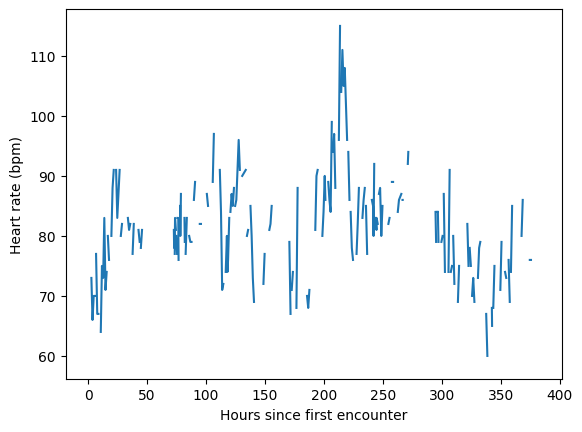

In [ ]:
#Visualise temporal data: Heart rate
X_train.loc[eIdx, "HeartRate"].plot()
plt.ylabel("Heart rate (bpm)")
plt.xlabel("Hours since first encounter")
plt.show()

In [ ]:
#Create patient id list from training datasets
eIdx_list = list(X_train.index.levels[0])
print('eIdx_list created of length {}'.format(len(eIdx_list)))

eIdx_list created of length 1335


In [ ]:
#Visualise valid patient data, debugging conducted to prevent KeyError from data that could not be recalled
nobs_list=[]
error=[]
savecorrect=[]
for ix in eIdx_list:
  try:
    nobs_list.append(X_train.loc[ix].index.shape[0])
    savecorrect.append(ix)
  except KeyError: #bypass KeyError
    error.append(ix)
    pass
print('list of observation counts created of length {}'.format(len(nobs_list))) #total number of valid data

list of observation counts created of length 934


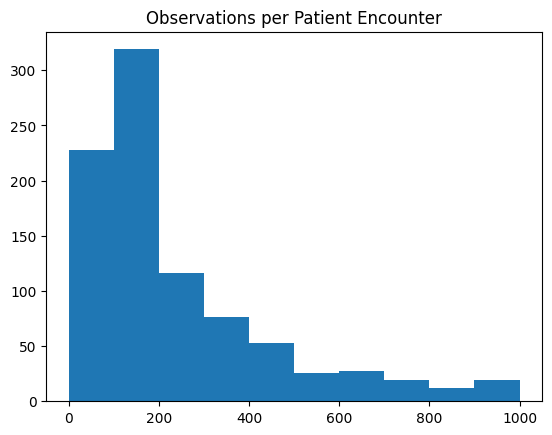

In [ ]:
#Data of observation conducted per patient
plt.hist(nobs_list,range=(0,1000))
plt.title("Observations per Patient Encounter")
plt.show()

In [ ]:
#Dataset details
print('The mean = {}'.format(np.mean(nobs_list)))
print('The median = {}'.format(np.median(nobs_list)))

The mean = 290.8340471092077
The median = 164.0


In [ ]:
#Gain list of patient id
eIdx_list = list(X_train.index.levels[0])
print('eIdx_list created of length {}'.format(len(eIdx_list)))

eIdx_list created of length 1335


In [ ]:
# Acquire timespan per patient data, same debugging conducted as the previous one
timespan_list=[]
error1=[]
savecorrect1=[]
for ix in eIdx_list:
  try:
    timespan_list.append(X_train.loc[ix].index[-1])
    savecorrect1.append(ix)
  except KeyError:
    error1.append(ix)
    pass
print('timespan_list created of length {} '.format(len(timespan_list)))

timespan_list created of length 934 


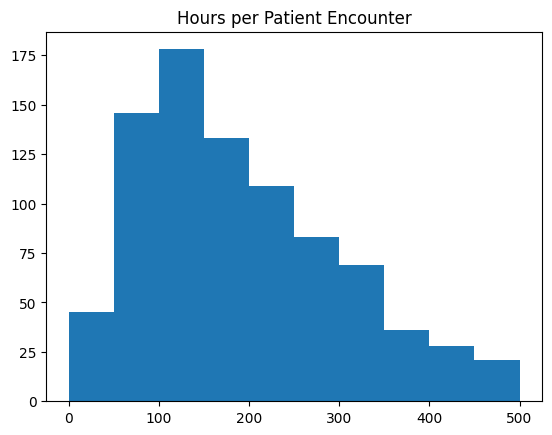

In [ ]:
#Visualise hours per patient encounter
plt.hist(timespan_list,range=(0,500))
plt.title("Hours per Patient Encounter")
plt.show()

In [ ]:
#Data details
print('The mean = {}'.format(np.mean(timespan_list)))
print('The median = {}'.format(np.median(timespan_list)))

The mean = 245.92499910778014
The median = 180.3744444444444


In [ ]:
#Normalization conducted to the dataset, changed from the github
from sklearn import preprocessing

x = X_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalize = pd.DataFrame(x_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
#Visualise normalized data
normalize

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,NaN,NaN,NaN,NaN,0.287879,NaN,0.958333,NaN,0.8375,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.212264,0.501916,0.221215,0.29235,0.287879,0.352273,0.937500,NaN,0.8375,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8375,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153768,0.8375,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8375,1.0,...,NaN,NaN,0.175141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4500,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4500,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4500,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4500,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Rewrite X_train with normalised data
for i in range(0,271639):
  X_train.iloc[i]=normalize.iloc[i]
  print(i)

Streaming output truncated to the last 5000 lines.
266639
266640
266641
266642
266643
266644
266645
266646
266647
266648
266649
266650
266651
266652
266653
266654
266655
266656
266657
266658
266659
266660
266661
266662
266663
266664
266665
266666
266667
266668
266669
266670
266671
266672
266673
266674
266675
266676
266677
266678
266679
266680
266681
266682
266683
266684
266685
266686
266687
266688
266689
266690
266691
266692
266693
266694
266695
266696
266697
266698
266699
266700
266701
266702
266703
266704
266705
266706
266707
266708
266709
266710
266711
266712
266713
266714
266715
266716
266717
266718
266719
266720
266721
266722
266723
266724
266725
266726
266727
266728
266729
266730
266731
266732
266733
266734
266735
266736
266737
266738
266739
266740
266741
266742
266743
266744
266745
266746
266747
266748
266749
266750
266751
266752
266753
266754
266755
266756
266757
266758
266759
266760
266761
266762
266763
266764
266765
266766
266767
266768
266769
266770
266771
266772
266773
2667

In [ ]:
#Visualise X_train
X_train

HeartRate     SysBP    DiasBP   MeanBP  RespRate  \
icustay_id absoluteTime                                                     
279238     0.062222            NaN       NaN       NaN      NaN  0.287879   
           0.562222       0.212264  0.501916  0.221215  0.29235  0.287879   
           0.928889            NaN       NaN       NaN      NaN       NaN   
           0.928889            NaN       NaN       NaN      NaN       NaN   
           1.028889            NaN       NaN       NaN      NaN       NaN   
...                            ...       ...       ...      ...       ...   
204749     838.495556          NaN       NaN       NaN      NaN       NaN   
           863.128889          NaN       NaN       NaN      NaN       NaN   
           886.362222          NaN       NaN       NaN      NaN       NaN   
           911.312222          NaN       NaN       NaN      NaN       NaN   
           935.645556          NaN       NaN       NaN      NaN       NaN   

                            TempC      SpO2   Glucose     age  gendera  ...  \
icustay_id absoluteTime                                                 ...   
279238     0.062222           NaN  0.958333       NaN  0.8375        1  ...   
           0.562222      0.352273  0.937500       NaN  0.8375        1  ...   
           0.928889           NaN       NaN       NaN  0.8375        1  ...   
           0.928889           NaN       NaN  0.153768  0.8375        1  ...   
           1.028889           NaN       NaN       NaN  0.8375        1  ...   
...                           ...       ...       ...     ...      ...  ...   
204749     838.495556         NaN       NaN       NaN  0.4500        1  ...   
           863.128889         NaN       NaN       NaN  0.4500        1  ...   
           886.362222         NaN       NaN       NaN  0.4500        1  ...   
           911.312222         NaN       NaN       NaN  0.4500        1  ...   
           935.645556         NaN       NaN       NaN  0.4500        1  ...   

                         CARBOXYHEMOGLOBIN  METHEMOGLOBIN   CALCIUM  \
icustay_id absoluteTime                                               
279238     0.062222                    NaN            NaN       NaN   
           0.562222                    NaN            NaN       NaN   
           0.928889                    NaN            NaN       NaN   
           0.928889                    NaN            NaN       NaN   
           1.028889                    NaN            NaN  0.175141   
...                                    ...            ...       ...   
204749     838.495556                  NaN            NaN       NaN   
           863.128889                  NaN            NaN       NaN   
           886.362222                  NaN            NaN       NaN   
           911.312222                  NaN            NaN       NaN   
           935.645556                  NaN            NaN       NaN   

                         INTUBATED  TIDALVOLUME  VENTILATIONRATE  VENTILATOR  \
icustay_id absoluteTime                                                        
279238     0.062222            NaN          NaN              NaN         NaN   
           0.562222            NaN          NaN              NaN         NaN   
           0.928889            NaN          NaN              NaN         NaN   
           0.928889            NaN          NaN              NaN         NaN   
           1.028889            NaN          NaN              NaN         NaN   
...                            ...          ...              ...         ...   
204749     838.495556          NaN          NaN              NaN         NaN   
           863.128889          NaN          NaN              NaN         NaN   
           886.362222          NaN          NaN              NaN         NaN   
           911.312222          NaN          NaN              NaN         NaN   
           935.645556          NaN          NaN              NaN         NaN   

                         PEEP 

In [ ]:
#Normalise X_test
x2 = X_test.values #returns a numpy array
min_max_scaler2 = preprocessing.MinMaxScaler()
x_scaled2 = min_max_scaler2.fit_transform(x2)
normalize2 = pd.DataFrame(x_scaled2)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
#Visualise normalized data
normalize2

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.845070,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.329949,NaN,NaN,NaN,0.235294,NaN,0.989583,NaN,0.845070,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.408088,0.247967,NaN,NaN,NaN,NaN,NaN,0.845070,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.179054,NaN,0.705882,NaN,NaN,0.845070,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.304569,0.378676,0.134146,0.182432,0.235294,NaN,0.968750,NaN,0.845070,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139818,0.253807,0.496324,0.170732,0.229730,0.191176,NaN,0.989583,NaN,0.901408,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139819,0.258883,0.496324,0.154472,0.222973,0.235294,NaN,1.000000,NaN,0.901408,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.901408,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.901408,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Update X_test Values
for i in range(0,139823):
  X_test.iloc[i]=normalize2.iloc[i]
  print(i)

Streaming output truncated to the last 5000 lines.
134823
134824
134825
134826
134827
134828
134829
134830
134831
134832
134833
134834
134835
134836
134837
134838
134839
134840
134841
134842
134843
134844
134845
134846
134847
134848
134849
134850
134851
134852
134853
134854
134855
134856
134857
134858
134859
134860
134861
134862
134863
134864
134865
134866
134867
134868
134869
134870
134871
134872
134873
134874
134875
134876
134877
134878
134879
134880
134881
134882
134883
134884
134885
134886
134887
134888
134889
134890
134891
134892
134893
134894
134895
134896
134897
134898
134899
134900
134901
134902
134903
134904
134905
134906
134907
134908
134909
134910
134911
134912
134913
134914
134915
134916
134917
134918
134919
134920
134921
134922
134923
134924
134925
134926
134927
134928
134929
134930
134931
134932
134933
134934
134935
134936
134937
134938
134939
134940
134941
134942
134943
134944
134945
134946
134947
134948
134949
134950
134951
134952
134953
134954
134955
134956
134957
1349

In [ ]:
#Check updated X_test
X_test

HeartRate     SysBP    DiasBP    MeanBP  RespRate  \
icustay_id absoluteTime                                                      
220163     -0.490833           NaN       NaN       NaN       NaN       NaN   
           -0.007500      0.329949       NaN       NaN       NaN  0.235294   
            0.009167           NaN  0.408088  0.247967       NaN       NaN   
            0.259167           NaN       NaN       NaN  0.179054       NaN   
            0.509167      0.304569  0.378676  0.134146  0.182432  0.235294   
...                            ...       ...       ...       ...       ...   
262560      80.565000     0.253807  0.496324  0.170732  0.229730  0.191176   
            81.565000     0.258883  0.496324  0.154472  0.222973  0.235294   
            94.815000          NaN       NaN       NaN       NaN       NaN   
            120.731667         NaN       NaN       NaN       NaN       NaN   
            144.565000         NaN       NaN       NaN       NaN       NaN   

                            TempC      SpO2  Glucose       age  gendera  ...  \
icustay_id absoluteTime                                                  ...   
220163     -0.490833          NaN       NaN      NaN  0.845070        1  ...   
           -0.007500          NaN  0.989583      NaN  0.845070        1  ...   
            0.009167          NaN       NaN      NaN  0.845070        1  ...   
            0.259167     0.705882       NaN      NaN  0.845070        1  ...   
            0.509167          NaN  0.968750      NaN  0.845070        1  ...   
...                           ...       ...      ...       ...      ...  ...   
262560      80.565000         NaN  0.989583      NaN  0.901408        1  ...   
            81.565000         NaN  1.000000      NaN  0.901408        1  ...   
            94.815000         NaN       NaN      NaN  0.901408        1  ...   
            120.731667        NaN       NaN      NaN  0.901408        1  ...   
            144.565000        NaN       NaN      NaN  0.901408        1  ...   

                         CARBOXYHEMOGLOBIN  METHEMOGLOBIN  CALCIUM  INTUBATED  \
icustay_id absoluteTime                                                         
220163     -0.490833                   NaN            NaN      NaN        NaN   
           -0.007500                   NaN            NaN      NaN        NaN   
            0.009167                   NaN            NaN      NaN        NaN   
            0.259167                   NaN            NaN      NaN        NaN   
            0.509167                   NaN            NaN      NaN        NaN   
...                                    ...            ...      ...        ...   
262560      80.565000                  NaN            NaN      NaN        NaN   
            81.565000                  NaN            NaN      NaN        NaN   
            94.815000                  NaN            NaN      NaN        NaN   
            120.731667                 NaN            NaN      NaN        NaN   
            144.565000                 NaN            NaN      NaN        NaN   

                         TIDALVOLUME  VENTILATIONRATE  VENTILATOR  PEEP  \
icustay_id absoluteTime                                                   
220163     -0.490833             NaN              NaN         NaN   NaN   
           -0.007500             NaN              NaN         NaN   NaN   
            0.009167             NaN              NaN         NaN   NaN   
            0.259167             NaN              NaN         NaN   NaN   
            0.509167             NaN              NaN         NaN   NaN   
...                              ...              ...         ...   ...   
262560      80.565000            NaN              NaN         NaN   NaN   
            81.565000            NaN              NaN         NaN   NaN   
            94.815000            NaN              NaN         NaN   NaN   
            120.731667           NaN              NaN         NaN   NaN   
            144

In [ ]:
#Choose random data
num = random.choice(list(X_train.index.levels[0]))

<ipython-input-32-8402dafc71f0>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_train.loc[eIdx,'HeartRate'].plot()


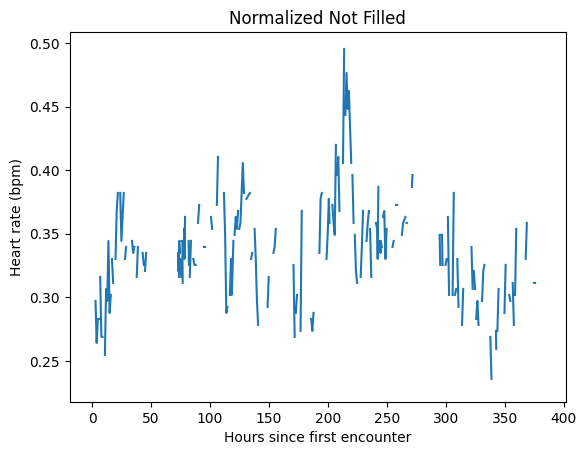

In [ ]:
#Visualise Heartrate before filled
X_train.loc[eIdx,'HeartRate'].plot()
plt.title("Normalized Not Filled")
plt.ylabel("Heart rate (bpm)")
plt.xlabel("Hours since first encounter")
plt.show()

In [ ]:
#Choose time dependent features to be forward filled, make the data continuous
timedependent=['HeartRate','SysBP','DiasBP','MeanBP','RespRate','TempC','SpO2','Glucose',
               'ANIONGAP', 'ALBUMIN', 'BANDS', 'BICARBONATE', 'BILIRUBIN', 'CREATININE', 'CHLORIDE', 'HEMATOCRIT', 'HEMOGLOBIN', 'LACTATE', 'PLATELET', 'POTASSIUM', 'PTT', 'INR', 'PT', 'SODIUM', 'BUN', 'WBC',
               'urine',
               'SPECIMEN_PROB','SO2', 'PO2', 'PCO2', 'fio2_chartevents', 'FIO2', 'AADO2', 'AADO2_calc', 'PaO2FiO2Ratio', 'PH', 'BASEEXCESS', 'TOTALCO2', 'CARBOXYHEMOGLOBIN', 'METHEMOGLOBIN', 'CALCIUM', 'INTUBATED', 'TIDALVOLUME', 'VENTILATIONRATE', 'VENTILATOR', 'PEEP', 'O2Flow', 'REQUIREDO2']
X_train[timedependent] = X_train.groupby(level=0)[timedependent].ffill()
X_test[timedependent] = X_test.groupby(level=0)[timedependent].ffill()

In [ ]:
#Visualised filled data
X_train

HeartRate     SysBP    DiasBP    MeanBP  RespRate  \
icustay_id absoluteTime                                                      
279238     0.062222            NaN       NaN       NaN       NaN  0.287879   
           0.562222       0.212264  0.501916  0.221215  0.292350  0.287879   
           0.928889       0.212264  0.501916  0.221215  0.292350  0.287879   
           0.928889       0.212264  0.501916  0.221215  0.292350  0.287879   
           1.028889       0.212264  0.501916  0.221215  0.292350  0.287879   
...                            ...       ...       ...       ...       ...   
204749     838.495556     0.358491  0.467433  0.177283  0.225274  0.303030   
           863.128889     0.358491  0.467433  0.177283  0.225274  0.303030   
           886.362222     0.358491  0.467433  0.177283  0.225274  0.303030   
           911.312222     0.358491  0.467433  0.177283  0.225274  0.303030   
           935.645556     0.358491  0.467433  0.177283  0.225274  0.303030   

                            TempC      SpO2   Glucose     age  gendera  ...  \
icustay_id absoluteTime                                                 ...   
279238     0.062222           NaN  0.958333       NaN  0.8375        1  ...   
           0.562222      0.352273  0.937500       NaN  0.8375        1  ...   
           0.928889      0.352273  0.937500       NaN  0.8375        1  ...   
           0.928889      0.352273  0.937500  0.153768  0.8375        1  ...   
           1.028889      0.352273  0.937500  0.153768  0.8375        1  ...   
...                           ...       ...       ...     ...      ...  ...   
204749     838.495556    0.630682  0.947917  0.163136  0.4500        1  ...   
           863.128889    0.630682  0.947917  0.163136  0.4500        1  ...   
           886.362222    0.630682  0.947917  0.163136  0.4500        1  ...   
           911.312222    0.630682  0.947917  0.163136  0.4500        1  ...   
           935.645556    0.630682  0.947917  0.163136  0.4500        1  ...   

                         CARBOXYHEMOGLOBIN  METHEMOGLOBIN   CALCIUM  \
icustay_id absoluteTime                                               
279238     0.062222                    NaN            NaN       NaN   
           0.562222                    NaN            NaN       NaN   
           0.928889                    NaN            NaN       NaN   
           0.928889                    NaN            NaN       NaN   
           1.028889                    NaN            NaN  0.175141   
...                                    ...            ...       ...   
204749     838.495556                  NaN            NaN       NaN   
           863.128889                  NaN            NaN       NaN   
           886.362222                  NaN            NaN       NaN   
           911.312222                  NaN            NaN       NaN   
           935.645556                  NaN            NaN       NaN   

                         INTUBATED  TIDALVOLUME  VENTILATIONRATE  VENTILATOR  \
icustay_id absoluteTime                                                        
279238     0.062222            NaN          NaN              NaN         NaN   
           0.562222            NaN          NaN              NaN         NaN   
           0.928889            NaN          NaN              NaN         NaN   
           0.928889            NaN          NaN              NaN         NaN   
           1.028889            NaN          NaN              NaN         NaN   
...                            ...          ...              ...         ...   
204749     838.495556          NaN     0.133044              NaN         NaN   
           863.128889          NaN     0.133044              NaN         NaN   
           886.362222          NaN     0.133044              NaN         NaN   
           911.312222          NaN     0.133044              NaN         NaN   
           935.645556          NaN     0.133044              NaN         NaN   

                 

In [ ]:
#Filled NA data with 0
X_train.fillna(value=0, inplace=True)
X_test.fillna(value=0, inplace=True)

<ipython-input-36-5c74da513cb9>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_train.loc[eIdx,'HeartRate'].plot()


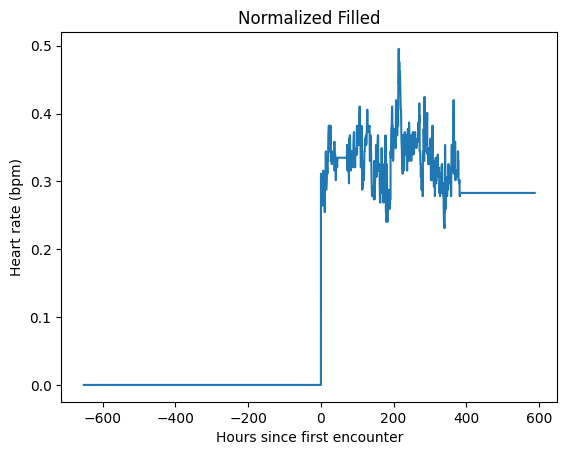

In [ ]:
#Visualised filled data
X_train.loc[eIdx,'HeartRate'].plot()
plt.title("Normalized Filled")
plt.ylabel("Heart rate (bpm)")
plt.xlabel("Hours since first encounter")
plt.show()

In [ ]:
#recheck valid patient id for X_test
nobs_list2=[]
error2=[]
savecorrect2=[]
eIdx_list = list(X_test.index.levels[0])
for ix in eIdx_list:
  try:
    nobs_list2.append(X_test.loc[ix].index.shape[0])
    savecorrect2.append(ix)
  except KeyError:
    error2.append(ix)
    pass

In [ ]:
#Change series to dataframe
y_train=y_train.to_frame()
y_test=y_test.to_frame()

In [ ]:
#pad sequence, debugged the code to make it runable
from tensorflow.keras.preprocessing import sequence

# max number of sequence length
maxlen = 200

# get a list of unique patient encounter IDs
teId = savecorrect
veId = savecorrect2

# pad every patient sequence with 0s to be the same length,
# then transforms the list of sequences to one numpy array
# this is for efficient minibatching and GPU computations
X_train = [X_train.loc[patient].values for patient in teId]
y_train = [y_train.loc[patient].values for patient in teId]

X_train = sequence.pad_sequences(X_train, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_train = sequence.pad_sequences(y_train, dtype='float32', maxlen=maxlen, padding='post', truncating='post')

# repeat for the validation data

X_test = [X_test.loc[patient].values for patient in veId]
y_test = [y_test.loc[patient].values for patient in veId]

X_test = sequence.pad_sequences(X_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')
y_test = sequence.pad_sequences(y_test, dtype='float32', maxlen=maxlen, padding='post', truncating='post')

In [ ]:
# print the shape of the array which will be used by the network
# the shape is of the form (# of encounters, length of sequence, # of features)
print("X_train shape: %s | y_train shape: %s" % (str(X_train.shape), str(y_train.shape)))
print("X_test shape: %s | y_test shape: %s" % (str(X_test.shape), str(y_test.shape)))

X_train shape: (934, 200, 20) | y_train shape: (934, 200, 1)
X_test shape: (401, 200, 20) | y_test shape: (401, 200, 1)


In [ ]:
#Save pre-processed data
np.save('X_train_rev.npy',X_train,allow_pickle=False)
np.save('y_train_rev.npy',y_train,allow_pickle=False)
np.save('X_test_rev.npy',X_test,allow_pickle=False)
np.save('y_test_rev.npy',y_test,allow_pickle=False)

In [ ]:
#Load data back for training
X_train=np.load('/content/drive/MyDrive/X_train_rev.npy')
X_test=np.load('/content/drive/MyDrive/X_test_rev.npy')
y_train=np.load('/content/drive/MyDrive/y_train_rev.npy')
y_test=np.load('/content/drive/MyDrive/y_test_rev.npy')

ix = 452


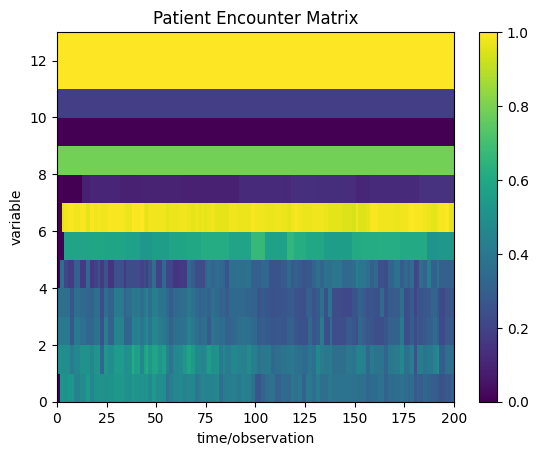

In [ ]:
#Visualise data
# figure out how many encounters we have
numencnt = X_train.shape[0]

# choose a random patient encounter to plot
ix = random.randint(0,933) #Try a few different index values between 0 and 4999
print('ix = {}'.format(ix))

# plot a matrix of observation values
plt.title("Patient Encounter Matrix")
plt.pcolor(np.transpose(X_train[ix,:,:]))
plt.ylabel("variable")
plt.xlabel("time/observation")
plt.ylim(0,13)
plt.colorbar()
plt.show()

In [ ]:
#Construct LSTM model
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Masking
from tensorflow.keras.optimizers import RMSprop

# construct inputs
x = Input((None, X_train.shape[-1]) , name='input')
mask = Masking(0, name='input_masked')(x)

# stack LSTMs
lstm_kwargs = {'dropout': 0.25, 'recurrent_dropout': 0.1, 'return_sequences': True, 'implementation': 2} #dropout to prevent overfitting
lstm1 = LSTM(16, name='lstm1', **lstm_kwargs)(mask) #16 Choosen as most effective unit

# output: sigmoid layer
output = TimeDistributed(Dense(1, activation='sigmoid'), name='output')(lstm1)
model = Model(inputs=x, outputs=output)

# compile model
optimizer = RMSprop(lr=0.005)
model.compile(optimizer=optimizer, loss='binary_crossentropy')

# print layer shapes and model parameters
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, None, 61)]        0         
                                                                 
 input_masked (Masking)      (None, None, 61)          0         
                                                                 
 lstm1 (LSTM)                (None, None, 16)          4992      
                                                                 
 output (TimeDistributed)    (None, None, 1)           17        
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Model training fitting
history = model.fit(X_train, y_train, batch_size=16, epochs=23, verbose=1) #Batchsize 16 and 23 epochs shown to have the most optimal result

Epoch 1/23
59/59 [==============================] - 17s 204ms/step - loss: 0.4667
Epoch 2/23
59/59 [==============================] - 11s 181ms/step - loss: 0.4268
Epoch 3/23
59/59 [==============================] - 12s 197ms/step - loss: 0.4121
Epoch 4/23
59/59 [==============================] - 12s 203ms/step - loss: 0.4051
Epoch 5/23
59/59 [==============================] - 12s 203ms/step - loss: 0.3975
Epoch 6/23
59/59 [==============================] - 12s 204ms/step - loss: 0.3952
Epoch 7/23
59/59 [==============================] - 12s 202ms/step - loss: 0.3836
Epoch 8/23
59/59 [==============================] - 14s 231ms/step - loss: 0.3744
Epoch 9/23
59/59 [==============================] - 11s 180ms/step - loss: 0.3723
Epoch 10/23
59/59 [==============================] - 12s 195ms/step - loss: 0.3657
Epoch 11/23
59/59 [==============================] - 12s 203ms/step - loss: 0.3654
Epoch 12/23
59/59 [==============================] - 12s 203ms/step - loss: 0.3647
Epoch 13/23
5

In [ ]:
#Visualise training loss
def plot_train_history(history, title):
  loss = history.history['loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.title(title)
  plt.legend()

  plt.show()

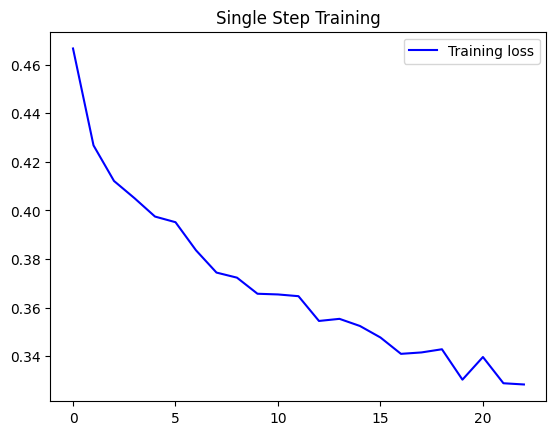

In [ ]:
#Visualise training loss
plot_train_history(history,
                   'Single Step Training')

In [ ]:
# Generate model prediction result on X_test
preds = model.predict(X_test)

13/13 [==============================] - 1s 34ms/step


In [ ]:
#prediction shape
preds.shape

(401, 200, 1)

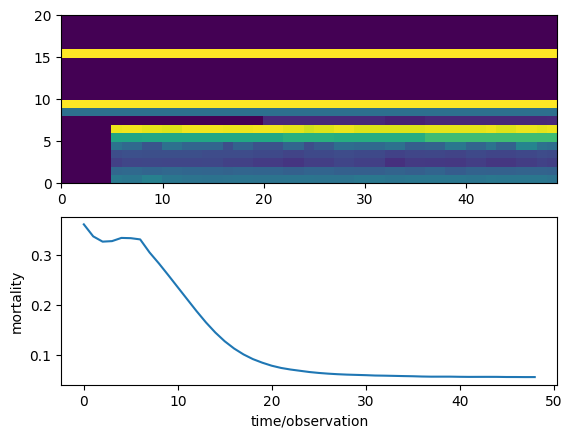

In [ ]:
#Visualise prediction data
# Figure out how many encounters we have
numencnt = X_test.shape[0]

# Choose a random patient encounter to plot
ix = random.randint(0,numencnt-1)

# Create axis side by side
f, (ax1, ax2) = plt.subplots(2, 1)

# Plot the observation chart for the random patient encounter
ax1.pcolor(np.transpose(X_test[ix,1:50,:]))
ax1.set_ylim(0,20)
plt.ylabel("mortality")
plt.xlabel("time/observation")

# Plot the patient survivability prediction
ax2.plot(preds[ix,1:50]);

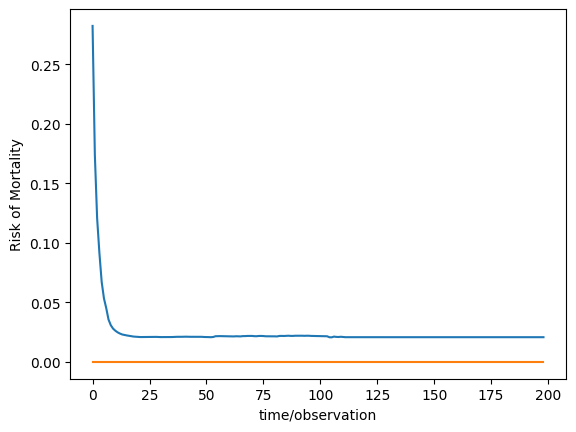

In [ ]:
#Visualise prediction result
# Figure out how many encounters we have
numencnt = X_test.shape[0]

# Choose a random patient encounter to plot
ix = random.randint(0,numencnt-1)

# Create axis side by side
# Plot the observation chart for the random patient encounter
# ax1.pcolor(np.transpose(X_test[ix,1:50,:]))
# ax1.set_ylim(0,20)
plt.ylabel("Risk of Mortality")
plt.xlabel("time/observation")

# Plot the patient survivability prediction
plt.plot(preds[ix,1::])
plt.plot(y_test[ix,1::])


In [ ]:
#Evaluate model prediction using roc curve
from sklearn.metrics import roc_curve, auc

# get 0/1 binary label for each patient encounter
label = y_test[:, 0, :].squeeze();

# get the last prediction in [0,1] for the patient
prediction = preds[:, -1, :].squeeze()

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])

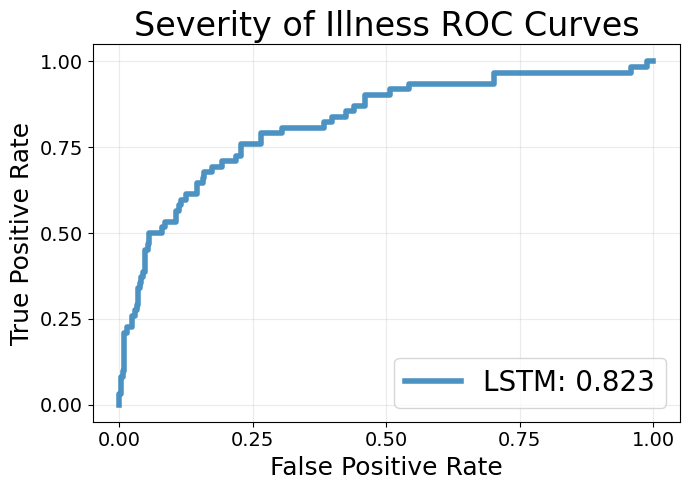

In [ ]:
# plot rocs & display AUCs, AUC is 82.3% which is acceptable to use
plt.figure(figsize=(7, 5))
line_kwargs = {'linewidth': 4, 'alpha': 0.8}
plt.plot(rnn_roc[0], rnn_roc[1], label='LSTM: %0.3f' % rnn_auc, **line_kwargs)
plt.legend(loc='lower right', fontsize=20)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))
plt.xticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.title("Severity of Illness ROC Curves", fontsize=24)
plt.grid(alpha=0.25)
plt.tight_layout()

In [ ]:
#Create checkpoint path to save model
checkpoint_path='/content/drive/MyDrive/model'
model.save(checkpoint_path)

In [ ]:
#Load model back
import tensorflow as tf
model1=tf.keras.models.load_model(checkpoint_path)

In [ ]:
preds = model1.predict(X_test)

13/13 [==============================] - 1s 31ms/step


In [ ]:
from sklearn.metrics import roc_curve, auc

# get 0/1 binary label for each patient encounter
label = y_test[:, 0, :].squeeze();

# get the last prediction in [0,1] for the patient
prediction = preds[:, -1, :].squeeze()

# compute ROC curve for predictions
rnn_roc = roc_curve(label,prediction)

# compute the area under the curve of prediction ROC
rnn_auc = auc(rnn_roc[0], rnn_roc[1])

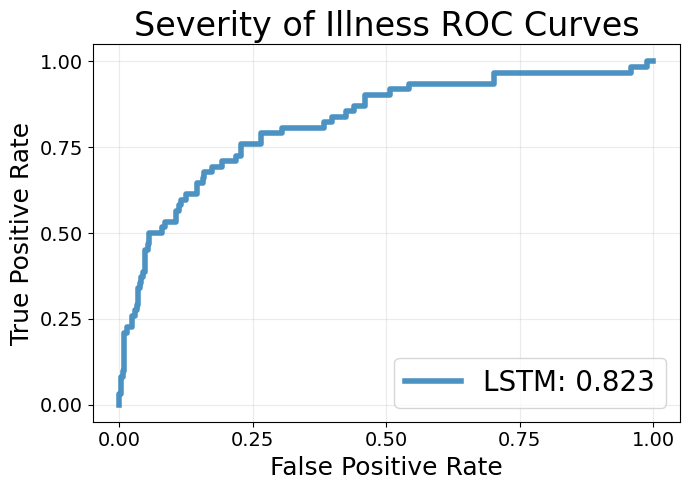

In [ ]:
# Model is saved successfully
plt.figure(figsize=(7, 5))
line_kwargs = {'linewidth': 4, 'alpha': 0.8}
plt.plot(rnn_roc[0], rnn_roc[1], label='LSTM: %0.3f' % rnn_auc, **line_kwargs)
plt.legend(loc='lower right', fontsize=20)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))
plt.xticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.title("Severity of Illness ROC Curves", fontsize=24)
plt.grid(alpha=0.25)
plt.tight_layout()